In [1]:
import numpy as np
import pandas as pd

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [2]:
train.shape

(891, 12)

In [3]:
test.shape

(418, 11)

In [10]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


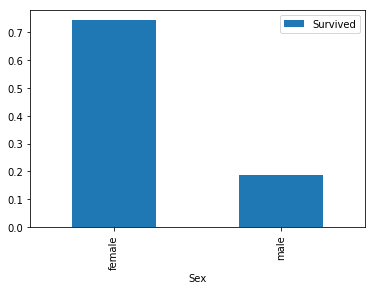

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
sex=train.pivot_table(index="Sex",values="Survived")
sex.plot.bar()

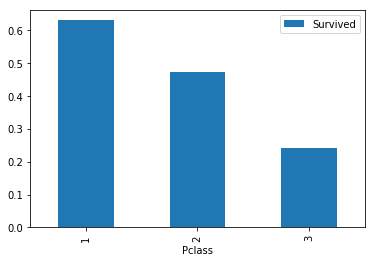

In [7]:
Pclass=train.pivot_table(index="Pclass",values="Survived")
Pclass.plot.bar()

In [9]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Cut the Age column into six segments:
Missing, from -1 to 0
Infant, from 0 to 5
Child, from 5 to 12
Teenager, from 12 to 18
Young Adult, from 18 to 35
Adult, from 35 to 60
Senior, from 60 to 100

In [15]:
cut_points=[-1,0,5,12,18,35,60,100]
labels=["missing","infants","children","teenager","young adult","adult","senior"]
train["Age"]=train["Age"].fillna(0)
train["agegroup"]=pd.cut(train["Age"],cut_points,labels=labels)

In [16]:
test["Age"]=test["Age"].fillna(0)
test["agegroup"]=pd.cut(test["Age"],cut_points,labels=labels)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young adult


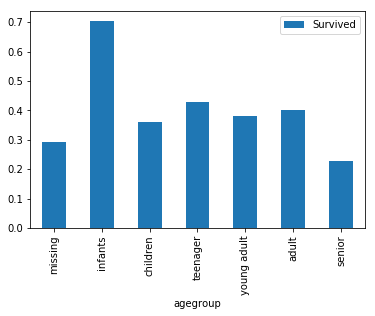

In [18]:
p=train.pivot_table(index="agegroup",values="Survived")
p.plot.bar()

In [25]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Pclass_3,Sex_female,Sex_male,agegroup_missing,agegroup_infants,agegroup_children,agegroup_teenager,agegroup_young adult,agegroup_adult,agegroup_senior
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,1,0,1,0,0,0,0,1,0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,1,1,0,0,0,0,0,0,1,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,0,0,1,0,0,0,0,0,0,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,1,0,1,0,0,0,0,1,0,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,1,1,0,0,0,0,0,1,0,0


In [20]:
train.set_index("PassengerId", inplace=True)
test.set_index("PassengerId", inplace=True)

In [22]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Sex","agegroup"]:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

In [23]:
y_train=train['Survived']
train.drop(labels="Survived",axis=1,inplace=True)

In [29]:
train.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Pclass_3,Sex_female,Sex_male,agegroup_missing,agegroup_infants,agegroup_children,agegroup_teenager,agegroup_young adult,agegroup_adult,agegroup_senior
PassengerId,,,,,,,,,,,,,,,,,,,,,
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,...,0,0,1,0,0,0,0,1,0,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,...,0,1,0,0,0,0,0,1,0,0
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.45,NaN,S,...,1,1,0,1,0,0,0,0,0,0
890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,...,0,0,1,0,0,0,0,1,0,0
891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,...,1,0,1,0,0,0,0,1,0,0


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,max_depth=2,random_state=0)
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'agegroup_missing','agegroup_infants',
       'agegroup_children', 'agegroup_teenager',
       'agegroup_young adult', 'agegroup_adult',
       'agegroup_senior']
"""rf.fit(train.loc[:'891','Pclass_1':],y_train)"""
rf.fit(train[columns],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [34]:
from sklearn.model_selection import train_test_split
X_train=train[columns]
train_X, test_X, train_y, test_y = train_test_split(X_train, y_train, test_size=0.20,random_state=0)


In [59]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
rf=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=20)
rf.fit(train_X,train_y)
pred=rf.predict(test_X)

In [60]:
acc=accuracy_score(test_y,pred)

In [61]:
print(acc)

0.8156424581005587


In [62]:
from sklearn.model_selection import cross_val_score
rf=GradientBoostingClassifier(learning_rate=0.05,max_depth=5,n_estimators=20)
scores=cross_val_score(rf,X_train,y_train,cv=10)
scores.sort()
acc=scores.mean()
print(scores)

print(acc)

[0.74157303 0.7752809  0.79775281 0.8        0.81111111 0.81818182
 0.82022472 0.83146067 0.83146067 0.86516854]
0.8092214277607536
